# Classifying with Decision Trees, Random Forest and Gradient Boost

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

## Loading data (Iris-Data)

In [83]:
# Loading data and extract feature-data and target-data
iris_dict = load_iris(as_frame=True)
iris_features = iris_dict['data']
iris_target = iris_dict['target']

# Inspect, if data is biased towards some target class
print(f'{iris_target.value_counts()}\nTarget classes are equally distributed.')

# Splitting into test and training data, no weights, as class representation is equal and will most
strat_splitter = StratifiedKFold(n_splits=5, shuffle=True)
# Create variables for one train/test-split and use just last of obtained splits
X_train, X_test, y_train, y_test = (pd.DataFrame([]) for i in range(4))
split = next(strat_splitter.split(iris_features, iris_target))
X_train = iris_features.iloc[split[0]]
X_test = iris_features.iloc[split[1]]
y_train = iris_target.iloc[split[0]]
y_test = iris_target.iloc[split[1]]

0    50
1    50
2    50
Name: target, dtype: int64
Target classes are equally distributed.


## Decision Tree Classifier

Accuracy on training data set:	96.7%
Accuracy on test data set:	93.3%
Result depends on chosen train/test-split. Crossvalidation is used to overcome this and tune hyperparameters.

Score on crossvalidation is: 96.0% +/- 5.3%


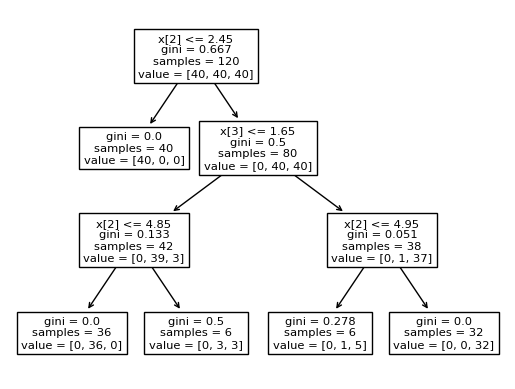

In [84]:
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
# Iris-dataset is 
tree.fit(X_train, y_train)
# Compare score on training data with score on test data, to check for overfitting
print(f'Accuracy on training data set:\t{tree.score(X_train, y_train):.1%}')
print(f'Accuracy on test data set:\t{tree.score(X_test, y_test):.1%}')
print('Result depends on chosen train/test-split. Crossvalidation is used to overcome this and \
tune hyperparameters.')
# Plot tree
plot_tree(tree)
# Generate train/test-split with approx. preserved distribution of target classes and do crossvalidation
tree_cross_score = cross_validate(tree, X=iris_features, y=iris_target, cv=10)['test_score']
print(f'\nScore on crossvalidation is: {tree_cross_score.mean():.1%} +/- {tree_cross_score.std():.1%}')